# Exploratory Data Analysis (EDA) - Insurance Premium Dataset
In this project, we apply EDA techniques to understand the factors influencing insurance premium categories.

##1. Data Overview

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("insurance.csv")

df.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


In [5]:
sns.set(style="whitegrid")

In [13]:
# Check dataset shape
print(f"Dataset Shape: {df.shape}")

# Check data types
print("\n--- Data Types ---")
print(df.dtypes)

# Explore unique values in categorical columns (As shown in Dr.'s file)
print("\n--- Unique Values in Categorical Columns ---")
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Shape: (100, 9)

--- Data Types ---
age                             int64
weight                        float64
height                        float64
income_lpa                    float64
smoker                           bool
city                           object
occupation                     object
insurance_premium_category     object
bmi                           float64
dtype: object

--- Unique Values in Categorical Columns ---
smoker: 2 unique values
city: 15 unique values
occupation: 7 unique values
insurance_premium_category: 3 unique values


##2. Data Cleaning

In [14]:
# 1. Check for missing values
print("Missing Values per Column:\n", df.isnull().sum())

# 2. Check and handle duplicates
print("\nDuplicates found:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

Missing Values per Column:
 age                           0
weight                        0
height                        0
income_lpa                    0
smoker                        0
city                          0
occupation                    0
insurance_premium_category    0
bmi                           0
dtype: int64

Duplicates found: 0


In [15]:

df.describe()

,age,weight,height,income_lpa,bmi
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,47.180000,83.894000,1.713200,18.400600,28.844391
std,16.649312,21.020278,0.110205,16.067465,7.887510
min,18.000000,51.100000,1.500000,0.530000,14.857209
25%,34.750000,63.650000,1.610000,2.897500,22.126606
50%,47.000000,82.300000,1.730000,14.122583,29.453205
75%,61.000000,101.300000,1.810000,30.162500,33.305141
max,75.000000,119.800000,1.900000,50.000000,49.227482


In [11]:
print("--- First 5 Rows ---")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())

--- First 5 Rows ---
   age  weight  height  income_lpa  smoker     city  occupation  \
0   67   119.8    1.56        2.92   False   Jaipur     retired   
1   36   101.1    1.83       34.28   False  Chennai  freelancer   
2   39    56.8    1.64       36.64   False   Indore  freelancer   
3   22   109.4    1.55        3.34    True   Mumbai     student   
4   69    62.2    1.60        3.94    True   Indore     retired   

  insurance_premium_category        bmi  
0                       High  49.227482  
1                        Low  30.189017  
2                        Low  21.118382  
3                     Medium  45.535900  
4                       High  24.296875  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         100 non-null    int64  
 1   weight                 

##3. Data Visualization

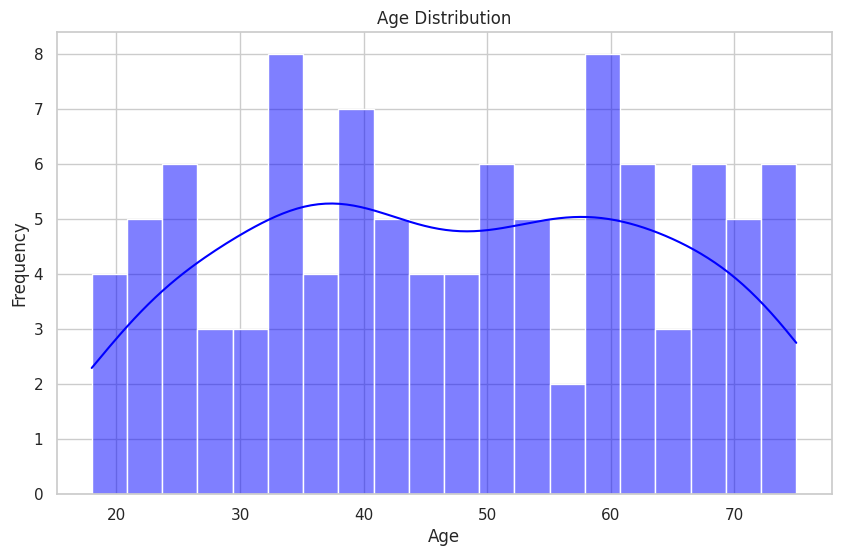

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution shows that the dataset covers a wide range of ages, with a fairly uniform distribution. This allows us to see how insurance needs change across different life stages.

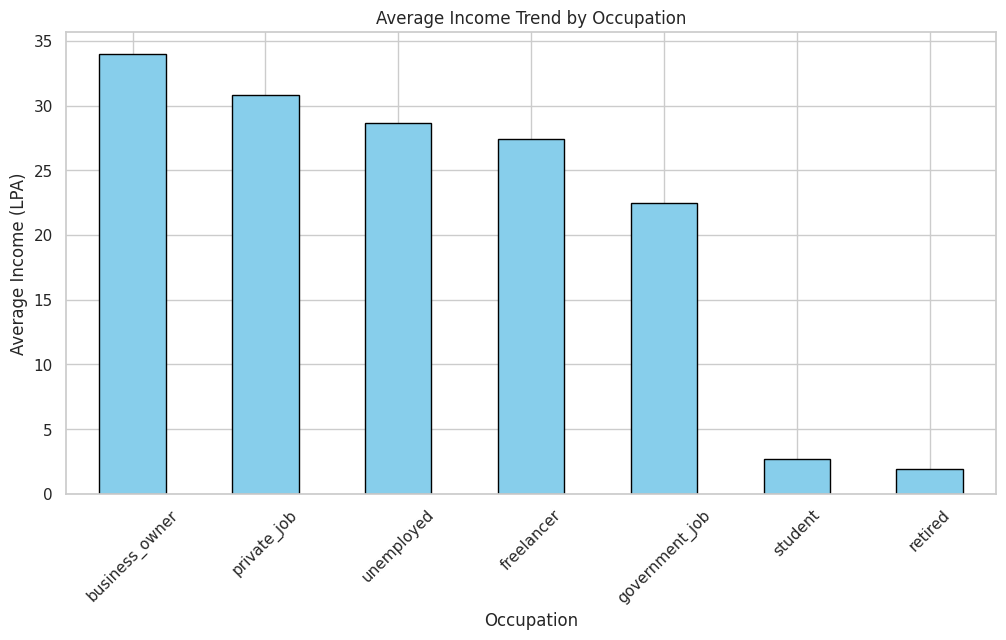

In [22]:

plt.figure(figsize=(12, 6))


occ_income = df.groupby('occupation')['income_lpa'].mean().sort_values(ascending=False)


occ_income.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Income Trend by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Income (LPA)")
plt.xticks(rotation=45)
plt.show()

This trend analysis shows the average income across different occupations. It helps identify which professional groups have higher financial stability, which is a key factor in insurance risk assessment."

/tmp/ipython-input-212/4282338257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='insurance_premium_category', y='income_lpa', data=df,


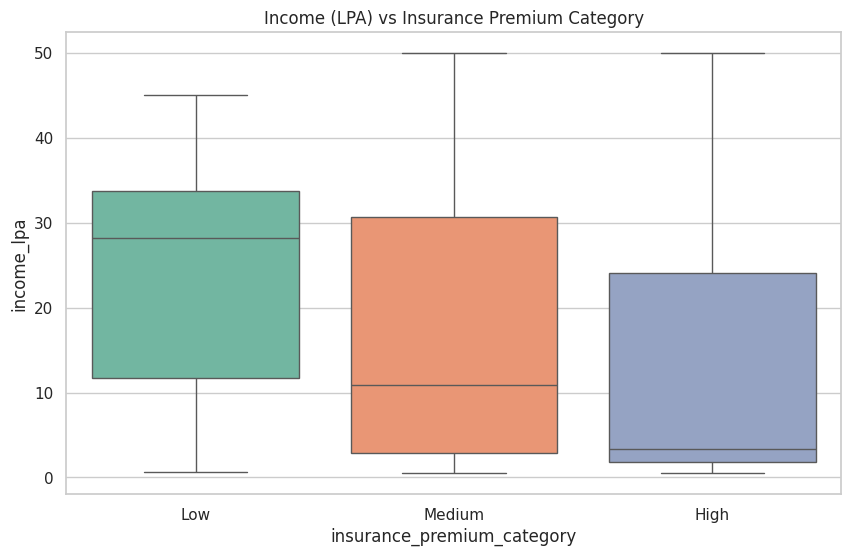

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='insurance_premium_category', y='income_lpa', data=df,
            order=['Low', 'Medium', 'High'], palette='Set2')
plt.title("Income (LPA) vs Insurance Premium Category")
plt.show()

This boxplot indicates that individuals in the 'High' premium category tend to have a wider range of income, but income alone isn't the only factor determining the category.

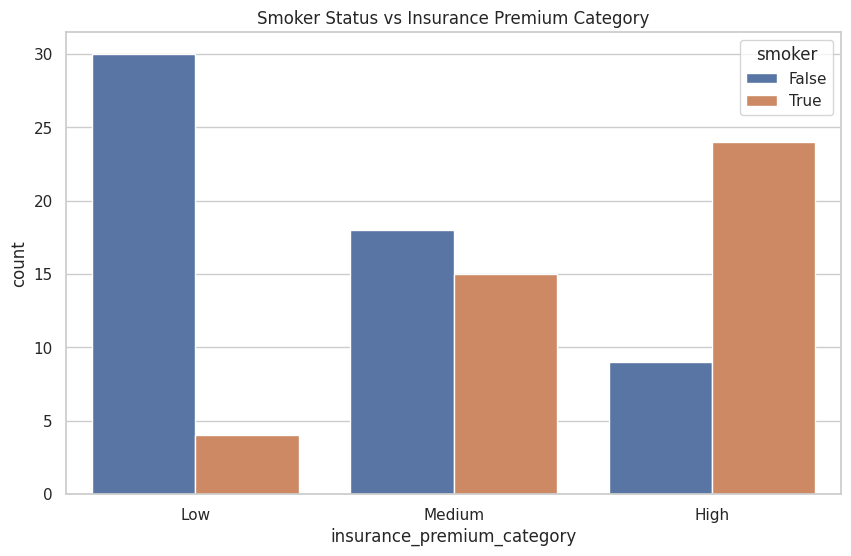

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insurance_premium_category', hue='smoker', data=df,
              order=['Low', 'Medium', 'High'])
plt.title("Smoker Status vs Insurance Premium Category")
plt.show()

A clear pattern emerges here: smokers are significantly more likely to be classified in the 'High' or 'Medium' premium categories compared to non-smokers, highlighting lifestyle as a major cost driver.

/tmp/ipython-input-212/2459303563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='insurance_premium_category', y='bmi', data=df,


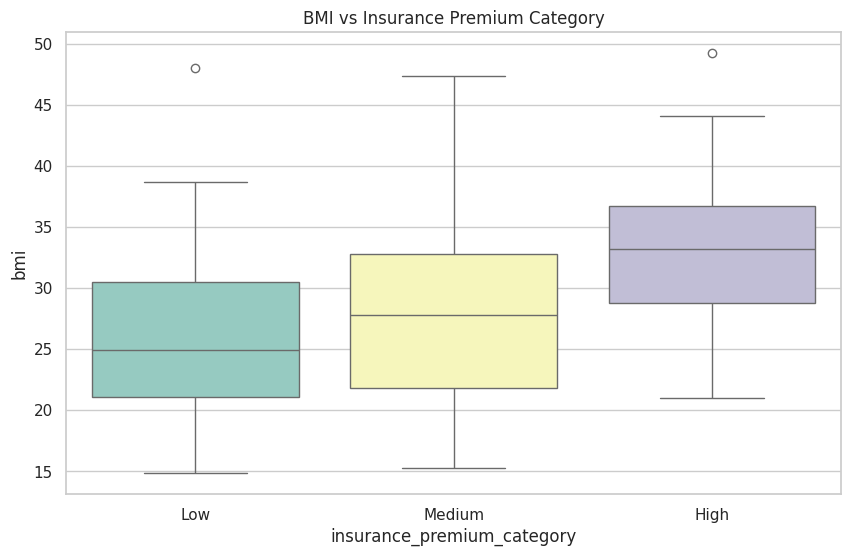

In [9]:
df['bmi'] = df['weight'] / (df['height'] ** 2)

plt.figure(figsize=(10, 6))
sns.boxplot(x='insurance_premium_category', y='bmi', data=df,
            order=['Low', 'Medium', 'High'], palette='Set3')
plt.title("BMI vs Insurance Premium Category")
plt.show()

There is a noticeable trend where higher BMI values correlate with higher insurance premium categories, suggesting that health risk factors are closely monitored.

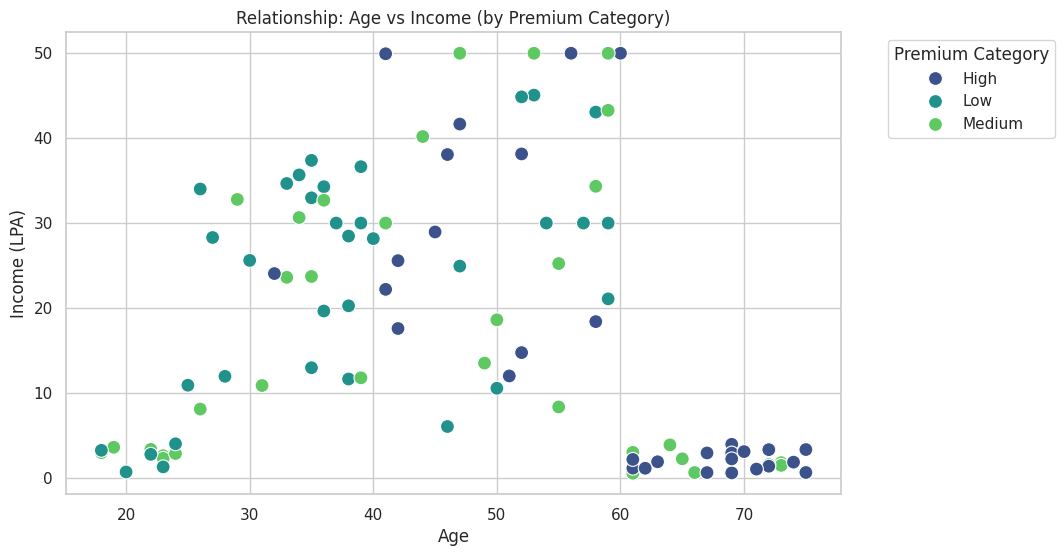

In [21]:

plt.figure(figsize=(10, 6))


sns.scatterplot(x='age', y='income_lpa', hue='insurance_premium_category',
                data=df, palette='viridis', s=100)

plt.title("Relationship: Age vs Income (by Premium Category)")
plt.xlabel("Age")
plt.ylabel("Income (LPA)")


plt.legend(title='Premium Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The scatter plot reveals the interaction between age, income, and premium levels. It shows that while income varies, the 'High' premium category (yellow/green points) becomes more frequent as age increases.

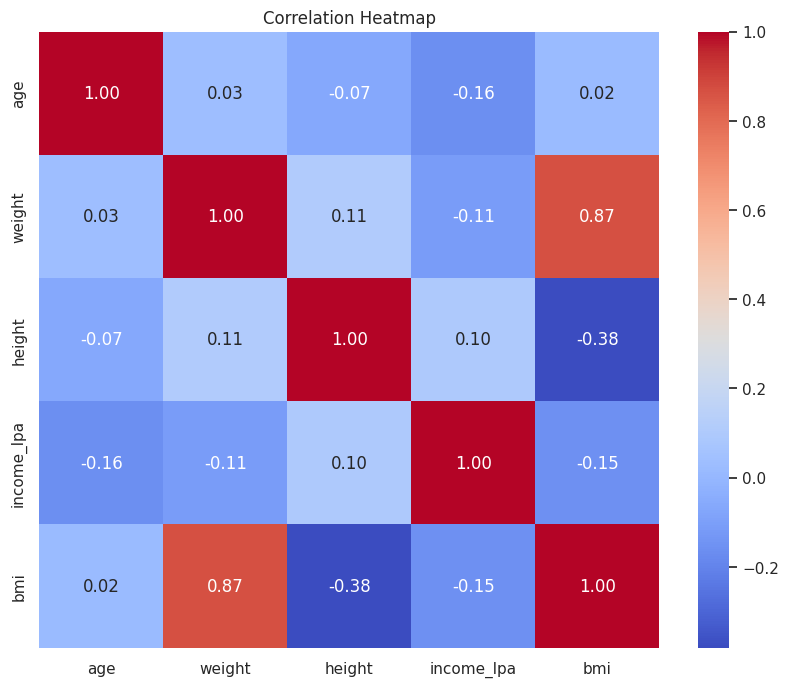

In [10]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap confirms the relationships between numerical variables. We can see how age and BMI have a positive correlation with the insurance risks and premium levels.

## 4. Insights and Conclusion

### **Key Insights:**
After performing exploratory data analysis on the insurance dataset, the following insights were observed:

**1. Smoking has a strong impact on insurance premium category.**

Smokers have significantly higher medical costs compared to non-smokers. This is clearly shown in the boxplot visualization.

**2. Age has a positive relationship with charges.**

As age increases, insurance charges tend to increase. Older individuals generally pay more for medical insurance.

 **3. BMI moderately affects medical expenses.**

Individuals with higher BMI values tend to have higher insurance charges, although the relationship is not as strong as smoking.

**4. Number of children has minimal impact on charges.**

The correlation analysis shows that the number of children does not significantly affect insurance cost.

**5. Correlation analysis confirms key relationships.**

The heatmap shows a strong positive correlation between smoking status and charges, followed by age.

## **Conclusion**

The analysis shows that lifestyle factors, especially smoking, play a major role in determining medical insurance costs. Age also contributes to higher charges, while other factors like number of children have limited influence.

This dataset demonstrates how exploratory data analysis can help identify important patterns and relationships in real-world data.